<a href="https://colab.research.google.com/github/RasitaChavan/Body_Performance_Tracker-_System_Using_Explainable_AI/blob/main/Copy_of_body_performance_tracker_syste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving bodyPerformance.csv to bodyPerformance (1).csv


In [ ]:
import pandas as pd
dataset = pd.read_csv('bodyPerformance.csv')
dataset.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
dataset.shape

(13393, 12)

In [ ]:
def data_summary(dataframe):
    summary = pd.DataFrame(dataframe.dtypes, columns = ['dtypes'])
    summary['missing'] = dataframe.isna().sum()
    summary['missing%'] = ((dataframe.isna().sum() / len(dataframe)) * 100).round(2)
    summary['uniques'] = dataframe.nunique().values
    summary['uniques%'] = ((dataframe.nunique().values / len(dataframe)) * 100).round(2)
    return (summary.style
        .map(lambda x: 'background-color: lightblue; color: black;' if x < 30 else None , subset = ['uniques'])
        .map(lambda x: 'background-color: red;' if x > 0 else None, subset = ['missing']))

In [ ]:
data_summary(dataset)

,dtypes,missing,missing%,uniques,uniques%
age,float64,0,0.000000,44,0.330000
gender,object,0,0.000000,2,0.010000
height_cm,float64,0,0.000000,467,3.490000
weight_kg,float64,0,0.000000,1398,10.440000
body fat_%,float64,0,0.000000,527,3.930000
diastolic,float64,0,0.000000,89,0.660000
systolic,float64,0,0.000000,102,0.760000
gripForce,float64,0,0.000000,550,4.110000
sit and bend forward_cm,float64,0,0.000000,528,3.940000
sit-ups counts,float64,0,0.000000,81,0.600000


In [ ]:
target = 'class'
categorical_data = ['gender']
numerical_data = list(dataset.drop(columns = [*categorical_data, target]).columns)

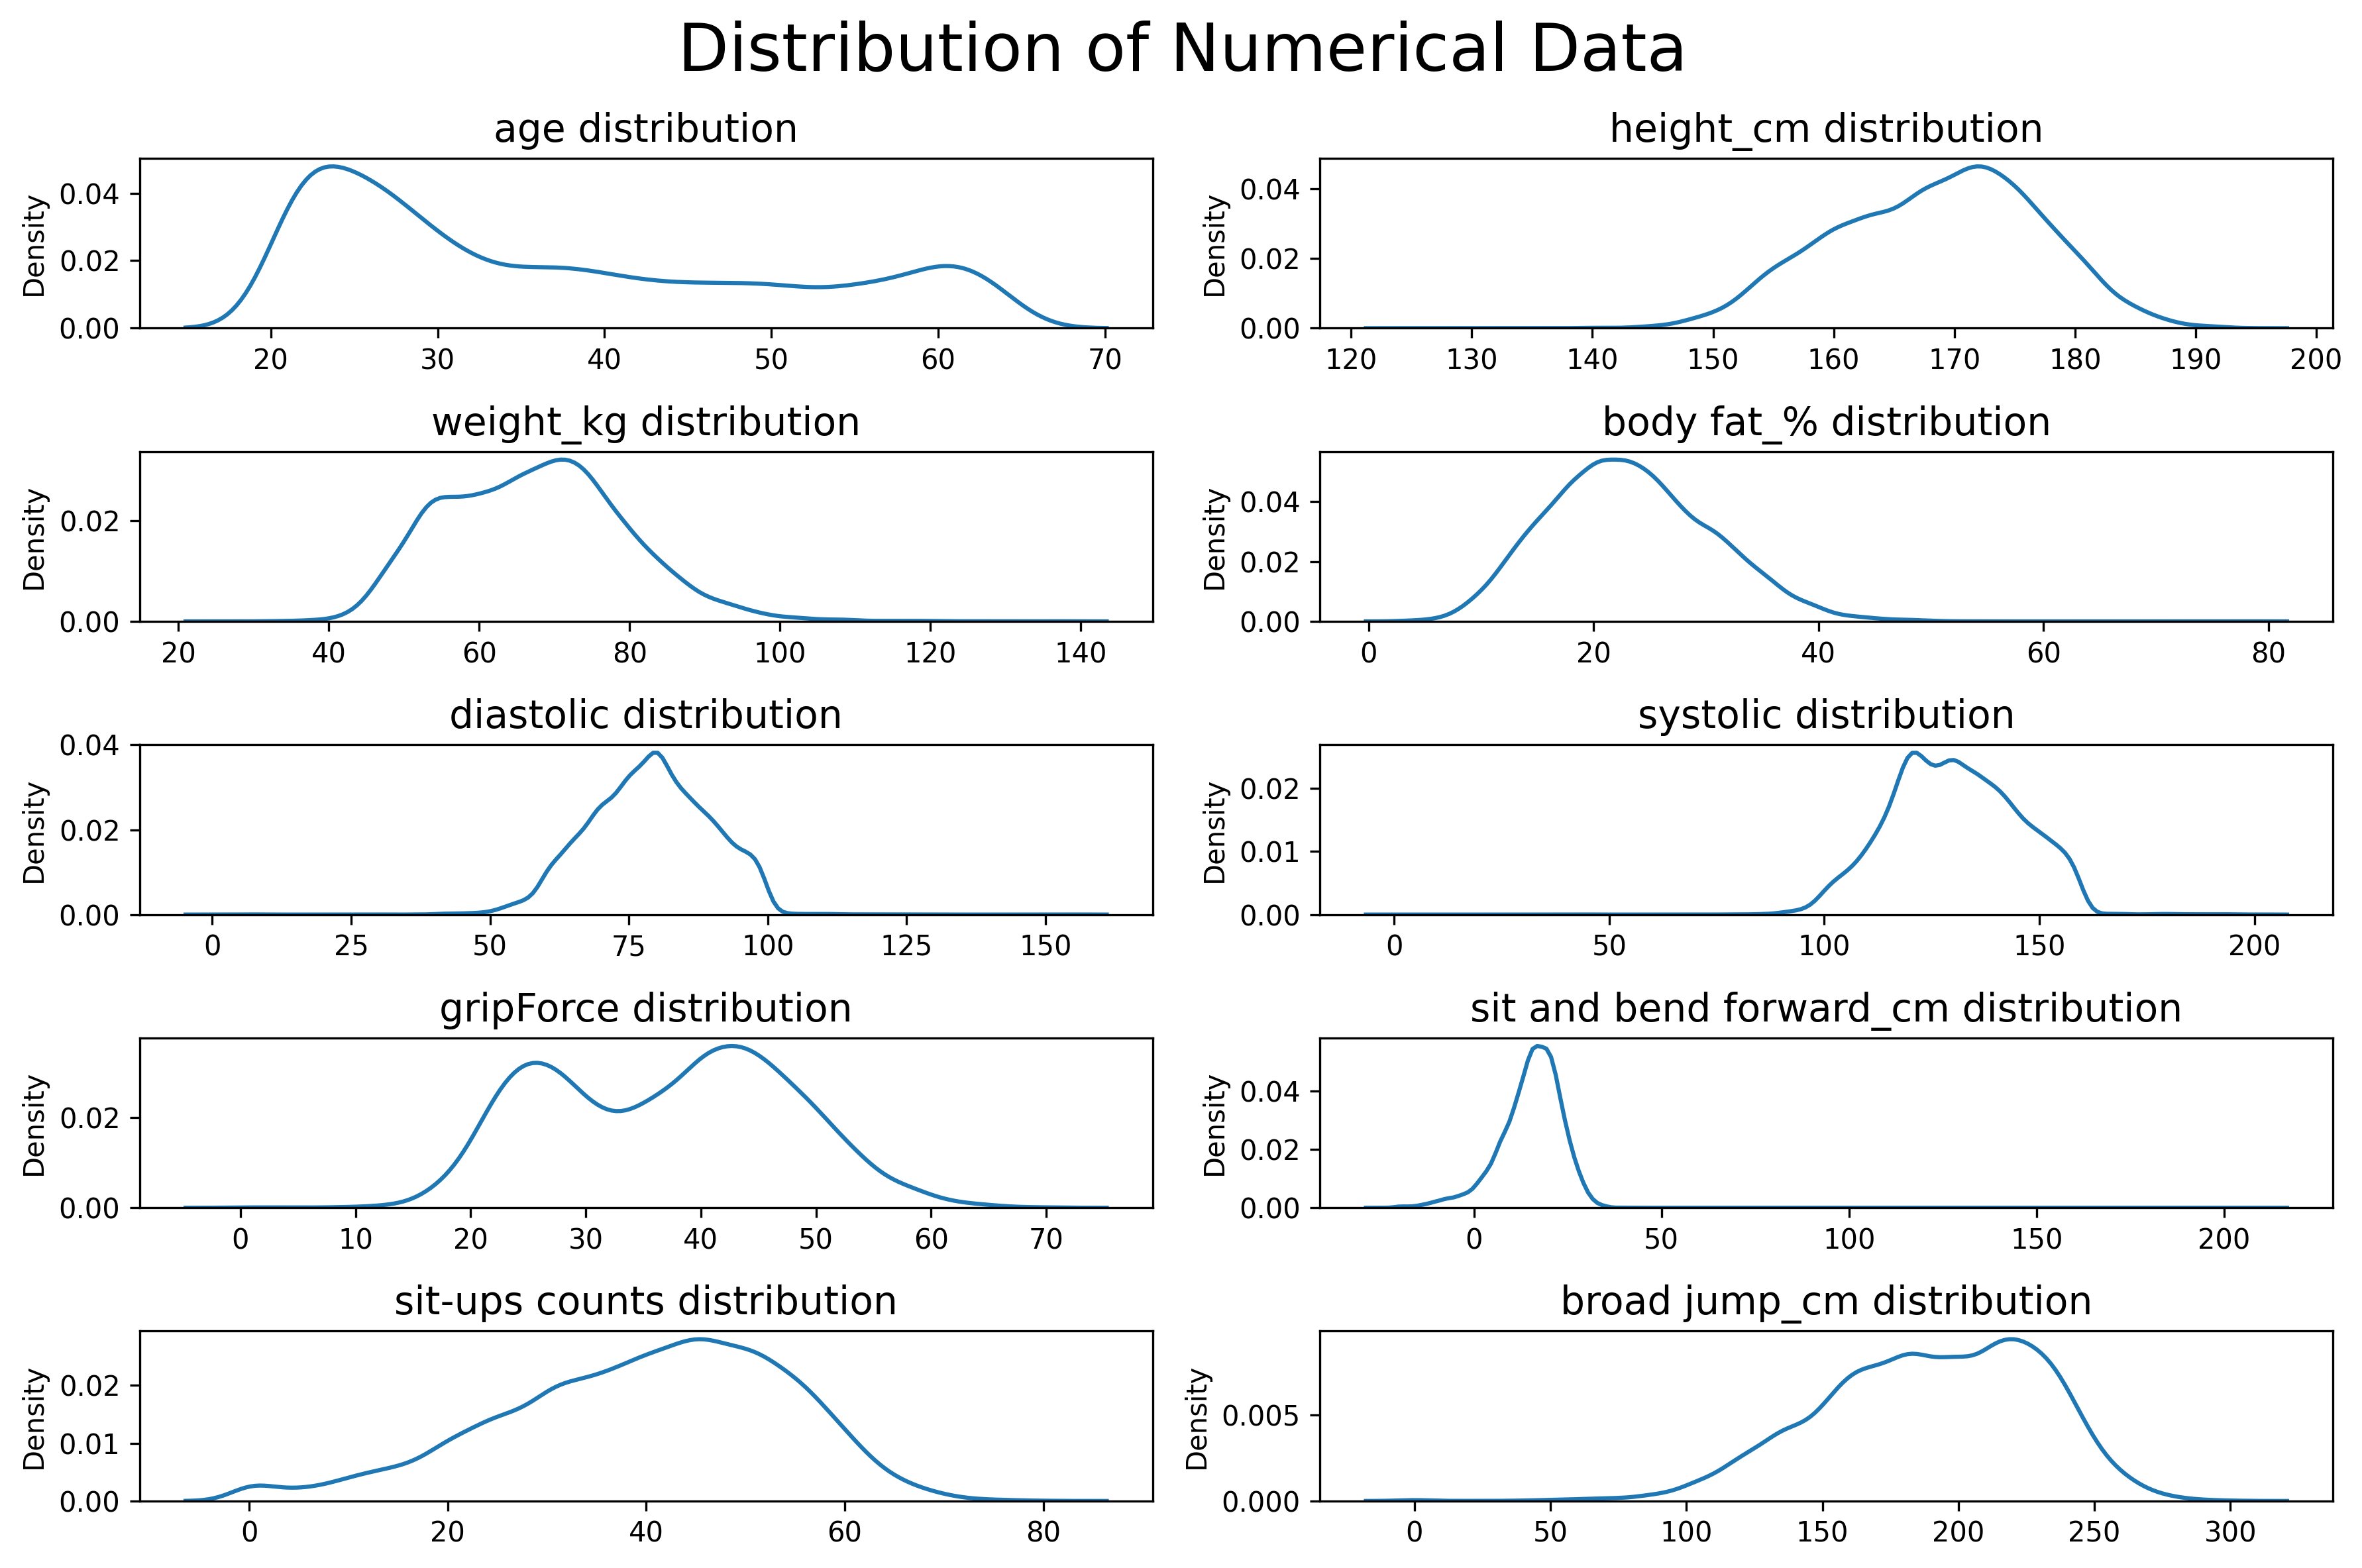

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (12, 8), dpi = 300)
axes = axes.flatten()

for i, column in enumerate(numerical_data):
    sns.kdeplot(dataset[column], ax = axes[i])
    axes[i].set_title(f'{column} distribution', size = 14)
    axes[i].set_xlabel(None)
fig.suptitle('Distribution of Numerical Data', fontsize = 24)
plt.tight_layout()

In [ ]:
dataset['gender'].value_counts() / len(dataset)

,count
gender,
M,0.632196
F,0.367804


Text(0.5, 1.0, 'Gender distribution')

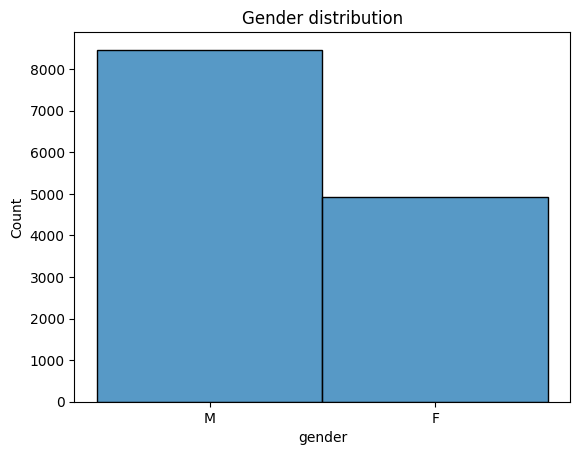

In [ ]:
ax = sns.histplot(
    x = dataset['gender'],
    data = dataset
)
ax.set_title('Gender distribution')

In [ ]:
dataset[target].value_counts() / len(dataset)

,count
class,
C,0.250056
D,0.250056
A,0.249981
B,0.249907


<Axes: title={'center': 'Class (target) distribution'}, xlabel='class', ylabel='Count'>

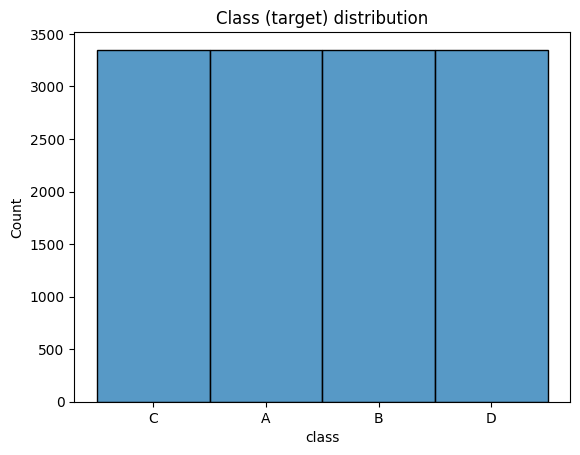

In [ ]:
ax = sns.histplot(
    x = dataset[target],
    data = dataset
)
ax.set_title('Class (target) distribution')
ax

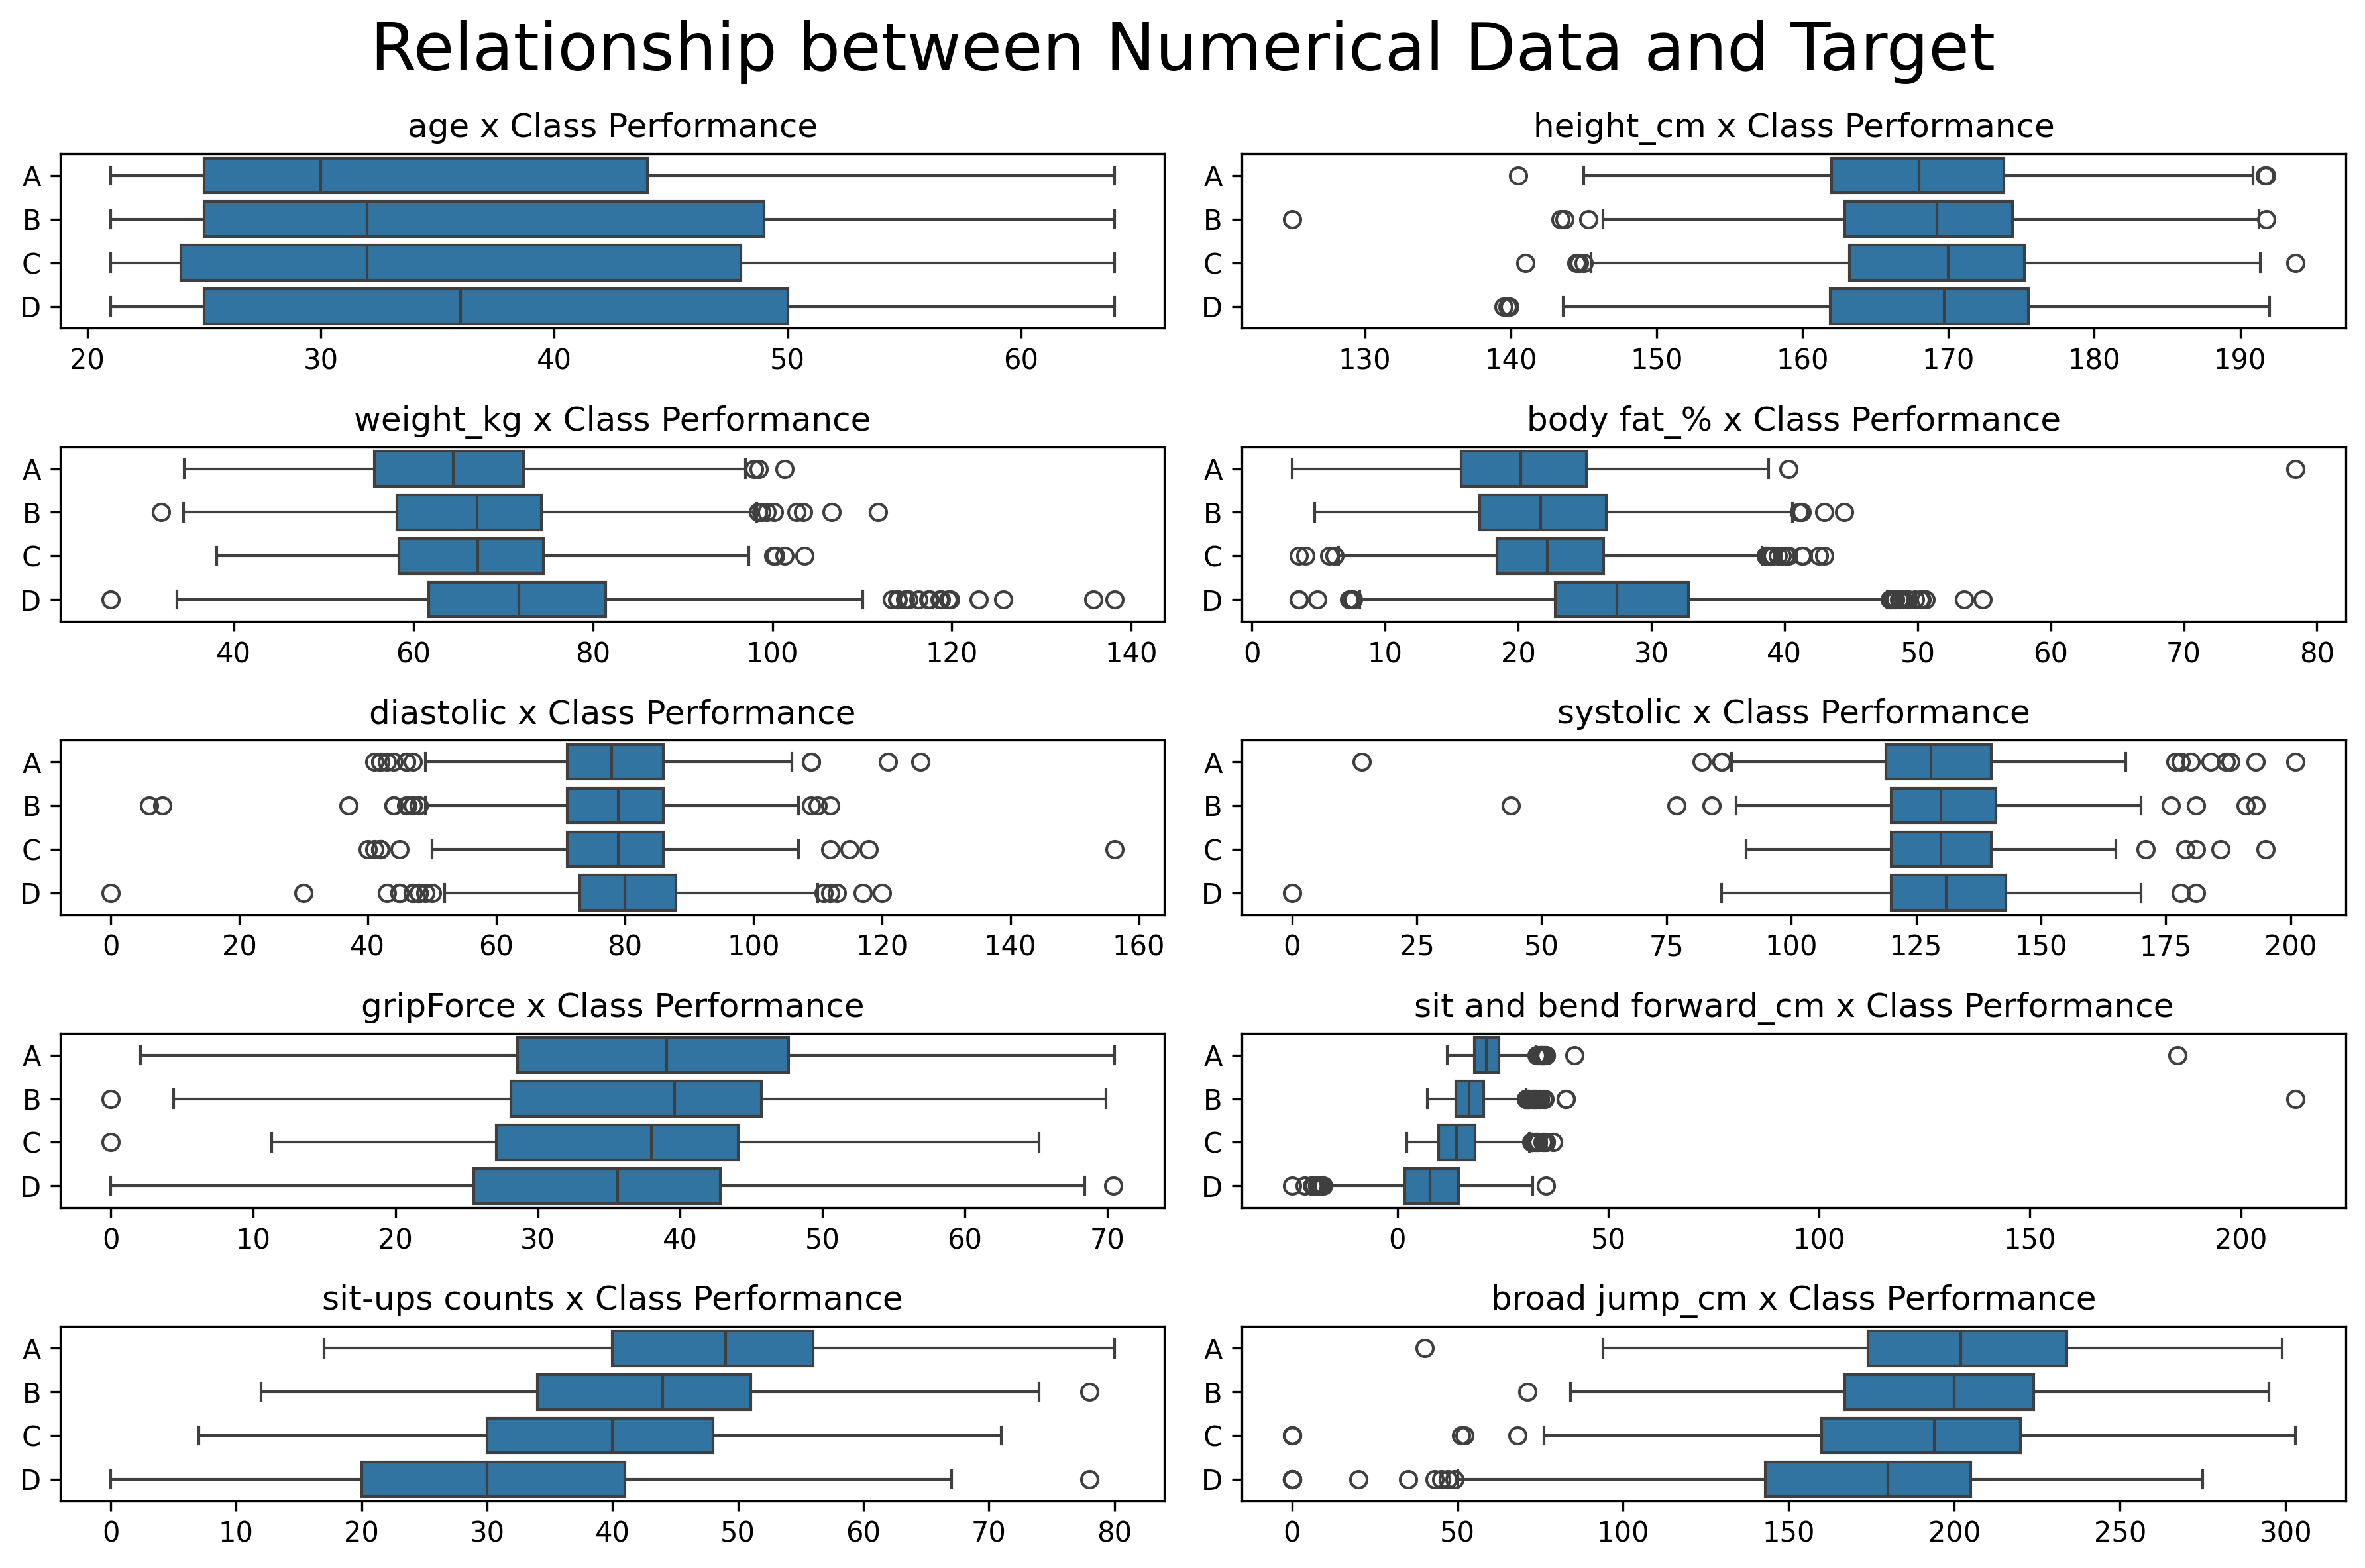

In [ ]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (12, 8), dpi = 300)
axes = axes.flatten()

for i, column in enumerate(numerical_data):
    ax = sns.boxplot(
        x = dataset[column],
        y = dataset[target],
        data = dataset,
        order = sorted(list(dataset[target].unique())),
        ax = axes[i]
    )
    ax.set_title(f'{column} x Class Performance')
    ax.set_xlabel(None)
    ax.set_ylabel(None)
fig.suptitle('Relationship between Numerical Data and Target', fontsize = 24)
plt.tight_layout()

In [ ]:
AUTO_REMOVE_OUTLIERS = False

In [ ]:
def remove_outliers(dataset, column):
    values = dataset[column]

    Q1 = values.quantile(0.25)
    Q3 = values.quantile(0.75)
    IQR = Q3 - Q1
    inferior_limit = Q1 - 1.5 * IQR
    superior_limit = Q3 + 1.5 * IQR

    selection = (values >= inferior_limit) & (values <= superior_limit)
    treated_dataset = dataset[selection]
    return treated_dataset

In [ ]:
if AUTO_REMOVE_OUTLIERS:
    for column in numerical_data:
        dataset = remove_outliers(dataset, column)

In [ ]:
dataset.shape

(13393, 12)

In [ ]:
gender_map = { 'M': 0, 'F': 1 }
class_map = { 'A': 0, 'B': 1, 'C': 2, 'D': 3 }

dataset['gender'] = dataset['gender'].map(gender_map)
dataset['class'] = dataset['class'].map(class_map)

In [ ]:
X = dataset.drop(columns = [target])
y = dataset[target]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    shuffle = True,
    test_size = 0.3
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)
acc = rfc.score(X_test, y_test)
print('Random Forest Classifier Accuracy: %.2f' % (acc * 100))

Random Forest Classifier Accuracy: 73.94


[Text(0, 0.5, 'A'), Text(0, 1.5, 'B'), Text(0, 2.5, 'C'), Text(0, 3.5, 'D')]

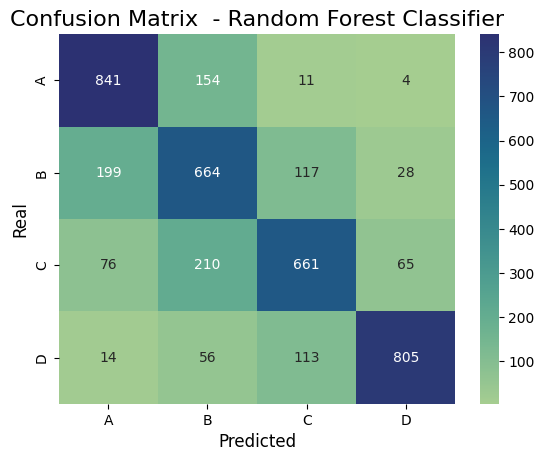

In [ ]:
from sklearn.metrics import confusion_matrix

pred = rfc.predict(X_test)
matrix = confusion_matrix(y_test, pred)
ax = sns.heatmap(
    data = matrix,
    annot = True,
    cmap = 'crest',
    fmt = 'd'
)
ax.set_title('Confusion Matrix  - Random Forest Classifier', fontsize = 16)
ax.set_ylabel('Real', fontsize = 12)
ax.set_xlabel('Predicted', fontsize = 12)
ax.set_xticklabels(class_map)
ax.set_yticklabels(class_map)

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
from sklearn.ensemble import RandomForestClassifier

# Set random seed for reproducibility
SEED = 42
np.random.seed(SEED)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)

# Initialize Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=SEED)

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
results = cross_validate(rfc, X_train, y_train, cv=cv, return_estimator=True)

# Print cross-validation results
#print("Cross-validation results:", results)

# Compute and print accuracy metrics
mean_score = results["test_score"].mean()
std_score = results["test_score"].std()
print("Accuracy Mean: %.2f%%" % (mean_score * 100))
print("Accuracy range: [%.2f%%, %.2f%%]" % ((mean_score - 2 * std_score) * 100, (mean_score + 2 * std_score) * 100))

# Train the final model on the full training set
final_model = RandomForestClassifier(n_estimators=100, random_state=SEED)
final_model.fit(X_train, y_train)

# Make predictions on the test set
final_predictions = final_model.predict(X_test)

# Print final predictions
print("Final Predictions on Test Set:", final_predictions[:10])  # Print first 10 predictions


Accuracy Mean: 72.51%
Accuracy range: [71.80%, 73.23%]
Final Predictions on Test Set: [3 2 2 3 1 0 3 0 3 1]


In [ ]:
import numpy as np
from lime.lime_tabular import LimeTabularExplainer

# Ensure the model is trained
if not hasattr(rfc, "estimators_"):
    rfc.fit(X_train, y_train)  # Fit the model before explaining

# Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=[str(cls) for cls in np.unique(y_train)],  # Dynamic class names
    mode="classification",
    discretize_continuous=True
)

# Pick a random test instance
idx = np.random.randint(0, X_test.shape[0])
sample = X_test.iloc[idx].values.reshape(1, -1)

# Predict class for the sample
predicted_class = rfc.predict(sample)[0]
predicted_probabilities = rfc.predict_proba(sample)[0]

# Generate explanation using LIME
exp = explainer.explain_instance(sample.flatten(), rfc.predict_proba, num_features=5)

# Print user-friendly explanation
print("\n🔹 **Final Prediction:**")
print(f"The model predicts that the person belongs to class: **{predicted_class}**")

print("\n📊 **Prediction Probabilities:**")
for i, prob in enumerate(predicted_probabilities):
    print(f"Class {i}: {prob:.2%}")

print("\n🧐 **Key Factors Influencing the Prediction:**")
for feature, weight in exp.as_list():
    print(f"➡ {feature}: {weight:.3f}")

print("\n🧐 **Display explanation visually:**")
exp.show_in_notebook()




🔹 **Final Prediction:**
The model predicts that the person belongs to class: **0**

📊 **Prediction Probabilities:**
Class 0: 50.00%
Class 1: 33.00%
Class 2: 15.00%
Class 3: 2.00%

🧐 **Key Factors Influencing the Prediction:**
➡ sit-ups counts <= 30.00: -0.127
➡ age > 48.00: 0.049
➡ sit and bend forward_cm > 20.70: 0.038
➡ 0.00 < gender <= 1.00: 0.033
➡ gripForce <= 27.50: -0.023

🧐 **Display explanation visually:**
